# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Hist, Pmf, Suite, Beta
import thinkplot

## Unreliable evaluators

This exercise is inspired by a question posted by a “redditor” named dominosci on Reddit’s statistics “subreddit” at http://reddit.com/r/statistics.

Reddit is an online forum with many interest groups called subreddits. Users, called redditors, post links to online content and other web pages. Other redditors vote on the links, giving an “upvote” to high-quality links and a “downvote” to links that are bad or irrelevant.

A problem, identified by dominosci, is that some redditors are more reliable than others, and Reddit does not take this into account.

The challenge is to devise a system so that when a redditor casts a vote, the estimated quality of the link is updated in accordance with the reliability of the redditor, and the estimated reliability of the redditor is updated in accordance with the quality of the link.

One approach is to model the quality of the link as the probability of garnering an upvote, and to model the reliability of the redditor as the probability of correctly giving an upvote to a high-quality item.

Write class definitions for redditors and links and an update function that updates both objects whenever a redditor casts a vote.

In [9]:
# Solution

# Here's one possible model:

#  Each article has a quality Q, which is the probability of 
#  eliciting an upvote from a completely reliable redditor. 

#  Each user has a reliability R, which is the probability of
#  giving an upvote to an item with Q=1.

#  The probability that a redditor with reliability R gives an
#  upvote to an item with quality Q is `R*Q + (1-R) * (1-Q)`

# Now when a redditor votes on a item, we simultaneously update our
# belief about the redditor and the item.

0.7

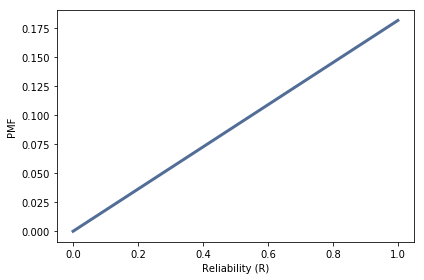

In [10]:
# Solution
    
# Suppose we start with a redditor who has demonstrated some reliability.

beta = Beta(2, 1)
redditor = beta.MakePmf(11)
thinkplot.Pdf(redditor)
thinkplot.decorate(xlabel='Reliability (R)',
                   ylabel='PMF')

mean_r = redditor.Mean()

0.5

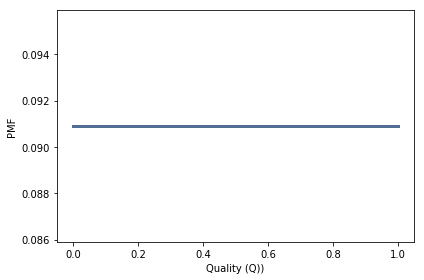

In [11]:
# Solution
    
# And a completely unknown item.

beta = Beta(1, 1)
item = beta.MakePmf(11)
thinkplot.Pdf(item)
thinkplot.decorate(xlabel='Quality (Q))',
                   ylabel='PMF')

mean_q = item.Mean()

In [12]:
# Solution

class Pair(Suite):
    """Represents hypotheses about the reliability and quality."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: q, r
        data: 'up' or 'down'
        """
        q, r = hypo
        if data == 'up':
            return r * q + (1-r) * (1-q)
        elif data == 'down':
            return r * (1-q) + (1-r) * q
        else:
            return 0

In [13]:
# Solution
    
# And here are the results.  Since we knew nothing about the item,
# the vote provides no information about the redditor:

d={}
for r, p1 in redditor.Items():
    for q, p2 in item.Items():
        d[q, r] = p1 * p2
        
suite = Pair(d);

In [14]:
# Solution
    
suite.Update('up')

0.5000000000000003

In [15]:
# Solution
    
redditor_post = Pmf()
for (q, r), p in suite.Items():
    redditor_post[r] += p
    
redditor_post.Total()

1.0

0.7

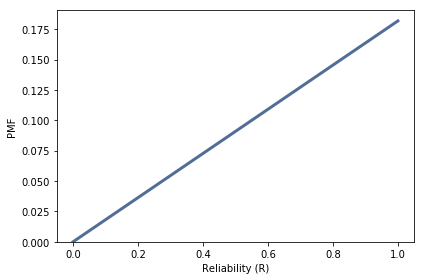

In [16]:
thinkplot.Pdf(redditor_post)
ylim = 0, redditor_post.MaxLike() * 1.05
thinkplot.decorate(xlabel='Reliability (R)',
                   ylabel='PMF', ylim=ylim)

mean_r = redditor_post.Mean()

In [17]:
item_post = Pmf()
for (q, r), p in suite.Items():
    item_post[q] += p
    
item_post.Total()

1.0

0.5800000000000001

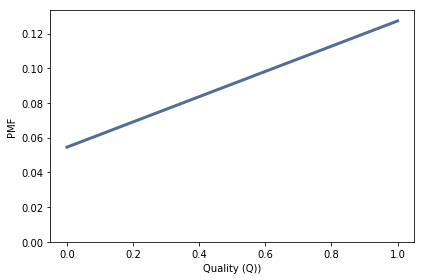

In [18]:
thinkplot.Pdf(item_post)
ylim = 0, item_post.MaxLike() * 1.05
thinkplot.decorate(xlabel='Quality (Q))',
                   ylabel='PMF', ylim=ylim)

mean_q = item_post.Mean()